In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pickle
import numpy as np
import pdb
from gwemlightcurves.KNModels import KNTable
from gwemlightcurves.EjectaFits.PaDi2019 import calc_meje, calc_vej
from gwemlightcurves import lightcurve_utils
import pandas as pd
from astropy.table import Table
mpl.rcParams['font.family'] = 'serif'
#mpl.rcParams['text.usetex'] = True
from astropy.coordinates import SkyCoord
import astropy.units as u
%matplotlib inline

Install gpytorch if you want to use it...


In [2]:
samples = pd.read_csv('/Users/viraj/winter/injection_data/bns_samples_realistic.dat', header=0, delimiter='\t')

In [3]:
index = 180 
crd = SkyCoord(ra=samples.iloc[index]['ra'],dec=samples.iloc[index]['dec'],unit=(u.rad,u.rad))

In [9]:
crd

<SkyCoord (ICRS): (ra, dec) in deg
    (255.73656524, 47.61818433)>

In [4]:
with open('output/bns_samples_realistic_Jband_phi30.0_abscos.pickle','rb') as f:
    J_lc_phi30 = pickle.load(f)

In [5]:
lc_crds = SkyCoord(ra=J_lc_phi30['ra'],dec=J_lc_phi30['dec'],unit=(u.rad,u.rad))

In [6]:
idx,d2d,d3d = crd.match_to_catalog_sky(lc_crds)

0.002628597581773911 0.023854623891844243 17.009784360178855
0.002628597581773911 0.023854623891844243 17.009784360178855
0.002628597581773911 0.023854623891844243 17.009784360178855


Text(0, 0.5, 'Apparent magnitude')

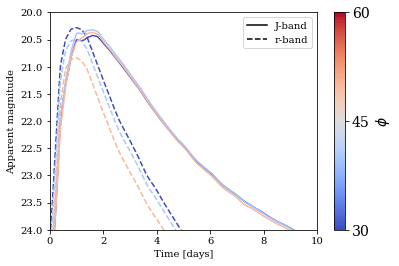

In [7]:
phis = [30.0,45.0,60.0]
N = len(phis)
colors = [plt.get_cmap('coolwarm')(1.* i/N) for i in range(N)]
norm = mpl.colors.Normalize(vmin=30, vmax=60)
cmap = mpl.cm.coolwarm

index = 180 
crd = SkyCoord(ra=samples.iloc[index]['ra'],dec=samples.iloc[index]['dec'],unit=(u.rad,u.rad))

for ind in range(len(phis)):
    phi = phis[ind]
    #print(phi)
    with open('output/bns_samples_realistic_Jband_phi%s_abscos.pickle'%(phi),'rb') as f:
        J_lc = pickle.load(f)
    with open('output/bns_samples_realistic_rband_phi%s_abscos.pickle'%(phi),'rb') as f:
        r_lc = pickle.load(f)
    
    J_lc_crds = SkyCoord(ra=J_lc['ra'],dec=J_lc['dec'],unit=(u.rad,u.rad))
    r_lc_crds = SkyCoord(ra=r_lc['ra'],dec=r_lc['dec'],unit=(u.rad,u.rad))
    
    J_idx,J_d2d,J_d3d = crd.match_to_catalog_sky(J_lc_crds)
    r_idx,r_d2d,r_d3d = crd.match_to_catalog_sky(r_lc_crds)
    #idx=np.where(J_lc[idx]['theta_jn']*180/np.pi == th)[0][0]
    
    J_DM = 5*np.log10(J_lc[J_idx]['luminosity_distance_Mpc']*1e5)
    r_DM = 5*np.log10(r_lc[r_idx]['luminosity_distance_Mpc']*1e5)
    
    #with open('../winter/gwemopt_sims/output_plots/plot_Bulla_Jband_phi_%s.pickle'%(phi),'wb') as f:
    #    pickle.dump(J_lc[J_idx],f)
    
    #with open('../winter/gwemopt_sims/output_plots/plot_Bulla_rband_phi_%s.pickle'%(phi),'wb') as f:
    #    pickle.dump(r_lc[r_idx],f)
        
    plt.plot(J_lc[J_idx]['t'],J_lc[J_idx]['mag'][0]+J_DM,'-',c=colors[ind])
    plt.plot(r_lc[r_idx]['t'],r_lc[r_idx]['mag'][0]+r_DM,'--',c=colors[ind])
    
    print(J_lc[J_idx]['mej_dyn'], J_lc[J_idx]['mej_wind'], J_lc[J_idx]['theta'])
    #print(r_lc[r_idx]['mej_dyn'], r_lc[r_idx]['mej_wind'], r_lc[r_idx]['theta'])

cbar = plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), orientation='vertical', ticks=[30, 45, 60])
cbar.set_label(label='$\phi$', size=14)
cbar.ax.tick_params(labelsize=14)
plt.plot(0,0, label='J-band', color='k', ls='-')
plt.plot(0,0, label='r-band', color='k', ls='--')
plt.legend(fontsize=10)
plt.ylim(24,20)
#plt.gca().invert_yaxis()
plt.xlim(0,10)
plt.xlabel('Time [days]')
plt.ylabel('Apparent magnitude')
#plt.savefig('../winter/gwemopt_sims/plots/Bulla_lcs_plot.pdf',bbox_inches='tight')

0.002628597581773911 0.023854623891844243 17.009784360178855
0.002628597581773911 0.023854623891844243 17.009784360178855
0.002628597581773911 0.023854623891844243 17.009784360178855
0.002628597581773911 0.023854623891844243 17.009784360178855
0.002628597581773911 0.023854623891844243 17.009784360178855
0.002628597581773911 0.023854623891844243 17.009784360178855


Text(0, 0.5, 'Apparent magnitude')

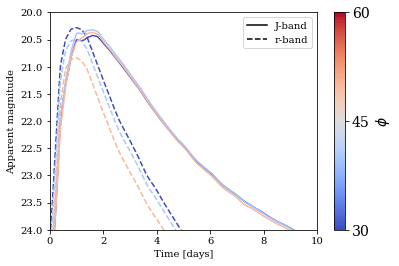

In [155]:
phis = [30.0,45.0,60.0]
N = len(phis)
colors = [plt.get_cmap('coolwarm')(1.* i/N) for i in range(N)]
norm = mpl.colors.Normalize(vmin=30, vmax=60)
cmap = mpl.cm.coolwarm

for ind in range(len(phis)):
    phi = phis[ind]
    #print(phi)
    with open('../winter/gwemopt_sims/output_plots/plot_Bulla_Jband_phi_%s.pickle'%(phi),'rb') as f:
        J_lc = pickle.load(f)
    with open('../winter/gwemopt_sims/output_plots/plot_Bulla_rband_phi_%s.pickle'%(phi),'rb') as f:
        r_lc = pickle.load(f)
    
    #J_lc_crds = SkyCoord(ra=J_lc['ra'],dec=J_lc['dec'],unit=(u.rad,u.rad))
    #r_lc_crds = SkyCoord(ra=r_lc['ra'],dec=r_lc['dec'],unit=(u.rad,u.rad))
    
    J_idx,J_d2d,J_d3d = 0,0,0#crd.match_to_catalog_sky(J_lc_crds)
    r_idx,r_d2d,r_d3d = 0,0,0#crd.match_to_catalog_sky(r_lc_crds)
    #idx=np.where(J_lc[idx]['theta_jn']*180/np.pi == th)[0][0]
    
    J_DM = 5*np.log10(J_lc['luminosity_distance_Mpc']*1e5)
    r_DM = 5*np.log10(r_lc['luminosity_distance_Mpc']*1e5)
    
    #with open('../winter/gwemopt_sims/output_plots/plot_Bulla_Jband_phi_%s.pickle'%(phi),'wb') as f:
    #    pickle.dump(J_lc[J_idx],f)
    
    #with open('../winter/gwemopt_sims/output_plots/plot_Bulla_rband_phi_%s.pickle'%(phi),'wb') as f:
    #    pickle.dump(r_lc[r_idx],f)
        
    plt.plot(J_lc['t'],J_lc['mag'][0]+J_DM,'-',c=colors[ind])
    plt.plot(r_lc['t'],r_lc['mag'][0]+r_DM,'--',c=colors[ind])
    
    print(J_lc['mej_dyn'], J_lc['mej_wind'], J_lc['theta'])
    print(r_lc['mej_dyn'], r_lc['mej_wind'], r_lc['theta'])

cbar = plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), orientation='vertical', ticks=[30, 45, 60])
cbar.set_label(label='$\phi$', size=14)
cbar.ax.tick_params(labelsize=14)
plt.plot(0,0, label='J-band', color='k', ls='-')
plt.plot(0,0, label='r-band', color='k', ls='--')
plt.legend(fontsize=10)
plt.ylim(24,20)
#plt.gca().invert_yaxis()
plt.xlim(0,10)
plt.xlabel('Time [days]')
plt.ylabel('Apparent magnitude')
#plt.savefig('../winter/gwemopt_sims/plots/Bulla_lcs_plot.pdf',bbox_inches='tight')

In [8]:
with open('output/plot_Bulla_Jband_phi_30.0.pickle','rb') as f:
    dat = pickle.load(f)
dat

luminosity_distance_Mpc,dec,ra,theta_jn,psi,phase,spin1,spin2,geocent_time,ms,mr,mass_1_source,mass_2_source,lambda1,lambda2,H1,L1,V1,K1,network_matched_filter_snr,m1,m2,mchirp,eta,q,chi_eff,r1,r2,c1,c2,mb1,mb2,mej_dyn,mej_wind,tini,dt,tmax,phi,theta,n_coeff,mej_dyn10,mej_wind10,t [751],lbol [751],"mag [9,751]"
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str5,str5,str5,str5,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,int64,float64,float64,float64,float64,float64
162.96513250175386,0.831094100432883,4.4634450811666495,0.29687674213935805,1.1680534794172135,1.0242667049172818,-0.026607287040999125,-0.0020898909344492875,1342863749.5713022,1.21576930702472,1.3602588293475757,1.3602588293475757,1.21576930702472,297.8492021647401,585.9717694960272,True,True,False,True,15.907545203588473,1.3602588293475757,1.21576930702472,1.1191634457929263,0.24921347684108672,1.118846167186484,0.0,11444.28924411263,11459.033462805266,0.17551044320597503,0.15666551925748337,1.5201654768501345,1.3410377363432604,0.002628597581773911,0.023854623891844243,0.01,0.02,15,30.0,17.009784360178855,10,-2.580275895975094,-1.6224274264320018,0.01 .. 15.009999999999998,1.8619333364698905e+40 .. 3.879159029109268e+39,-10.658318782474446 .. 0.0


In [145]:
with open('output/plot_Bulla_phi_60.0.pickle','wb') as f:
    pickle.dump(J_lc[J_idx],f)

In [136]:
np.arccos(np.abs(np.cos(J_lc[J_idx]['theta_jn'])))*180/np.pi

17.009784360178855

In [115]:
th = J_lc[idx]['theta_jn']*180/np.pi

0.002628597581773911 0.023854623891844243 17.009784360178855
0.002628597581773911 0.023854623891844243 17.009784360178855
0.002628597581773911 0.023854623891844243 17.009784360178855
0.002628597581773911 0.023854623891844243 17.009784360178855
0.002628597581773911 0.023854623891844243 17.009784360178855
0.002628597581773911 0.023854623891844243 17.009784360178855


Text(0, 0.5, 'Apparent magnitude')

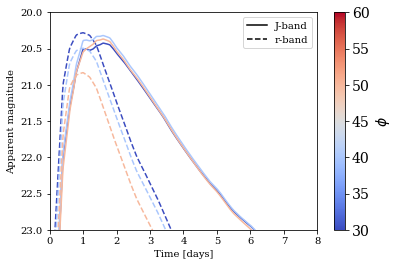

In [133]:
phis = [30,45,60]
N = len(phis)
colors = [plt.get_cmap('coolwarm')(1.* i/N) for i in range(N)]
norm = mpl.colors.Normalize(vmin=30, vmax=60)
cmap = mpl.cm.coolwarm

for ind in range(len(phis)):
    phi = phis[ind]
    #print(phi)
    with open('output/bns_samples_realistic_Jband_phi%s.pickle'%(phi),'rb') as f:
        J_lc = pickle.load(f)
    with open('output/bns_samples_realistic_rband_phi%s.pickle'%(phi),'rb') as f:
        r_lc = pickle.load(f)
    J_lc_crds = SkyCoord(ra=J_lc['ra'],dec=J_lc['dec'],unit=(u.rad,u.rad))
    r_lc_crds = SkyCoord(ra=r_lc['ra'],dec=r_lc['dec'],unit=(u.rad,u.rad))
    
    J_idx,J_d2d,J_d3d = crd.match_to_catalog_sky(J_lc_crds)
    r_idx,r_d2d,r_d3d = crd.match_to_catalog_sky(r_lc_crds)
    #idx=np.where(J_lc[idx]['theta_jn']*180/np.pi == th)[0][0]
    
    J_DM = 5*np.log10(J_lc[J_idx]['luminosity_distance_Mpc']*1e5)
    r_DM = 5*np.log10(r_lc[r_idx]['luminosity_distance_Mpc']*1e5)
    plt.plot(J_lc[J_idx]['t'],J_lc[J_idx]['mag'][0]+J_DM,'-',c=colors[ind])
    plt.plot(r_lc[r_idx]['t'],r_lc[r_idx]['mag'][0]+r_DM,'--',c=colors[ind])
    
    print(J_lc[J_idx]['mej_dyn'], J_lc[J_idx]['mej_wind'], J_lc[J_idx]['theta'])
    print(r_lc[r_idx]['mej_dyn'], r_lc[r_idx]['mej_wind'], r_lc[r_idx]['theta'])
    
cbar = plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), orientation='vertical')
cbar.set_label(label='$\phi$', size=14)
cbar.ax.tick_params(labelsize=14)
plt.plot(0,0, label='J-band', color='k', ls='-')
plt.plot(0,0, label='r-band', color='k', ls='--')
plt.legend(fontsize=10)
plt.ylim(23,20)
#plt.gca().invert_yaxis()
plt.xlim(0,8)
plt.xlabel('Time [days]')
plt.ylabel('Apparent magnitude')
#plt.savefig('../winter/gwemopt_sims/plots/lcs_plot.pdf',bbox_inches='tight')

In [128]:
J_lc[idx]['mej_dyn'], J_lc[idx]['mej_wind'], J_lc[idx]['theta']

(0.002628597581773911, 0.023854623891844243, 17.009784360178855)

In [96]:
np.arccos(np.abs(np.cos(J_lc[idx]['theta_jn'])))*180/np.pi

17.009784360178855

In [109]:
J_lc[idx]['theta']

94.63806967285436

In [101]:
J_lc[0]['theta_jn']*180/np.pi 

115.18671098666883

In [91]:
J_lc[1]['theta_jn']*180/np.pi

125.79376389716

In [70]:
J_lc[2]['theta_jn']*180/np.pi

94.63806967285436

In [74]:
peakmags = []
for row in J_lc:
    peakmags.append(np.min(row['mag'][0]))

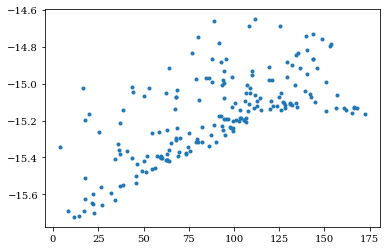

In [77]:
plt.plot(J_lc['theta'],peakmags,'.')